In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 767.3 kB/s eta 0:00:00


In [ ]:
!pip install keras.utils.np_utils

ERROR: Could not find a version that satisfies the requirement keras.utils.np_utils (from versions: none)
ERROR: No matching distribution found for keras.utils.np_utils


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fb_sentiment (2).csv to fb_sentiment (2) (1).csv


**Facebook comments Sentiment analysis**

The aim of this notebook is to train and test a Neural Network to detect, if a Facebook comment is either positive or negative in nature, based on a sample of Facebook comments with attatched sentiment ratings.

In [ ]:
import io
fb = pd.read_csv(io.BytesIO(uploaded['fb_sentiment (2) (1).csv']))
print(fb)

     Unnamed: 0                                             FBPost Label
0             0  Drug Runners and  a U.S. Senator have somethin...     O
1             1  Heres a single, to add, to Kindle. Just read t...     O
2             2  If you tire of Non-Fiction.. Check out http://...     O
3             3    Ghost of Round Island is supposedly nonfiction.     O
4             4  Why is Barnes and Nobles version of the Kindle...     N
..          ...                                                ...   ...
995         995  I liked it.  Its youth oriented and I think th...     P
996         996  I think the point of the commercial is that, e...     P
997         997  Kindle 3 is such a great product. I could not ...     P
998         998  develop a way to share books!  that is a big d...     N
999         999                               I love my kindle! =)     P

[1000 rows x 3 columns]


**Exploring Data**

The data that we have chosen are Facebook-comments (FBPost) , with sentiments (Label) rated positive, negative or other. There are rows in the dataset, with an uneven distribution of sentiments.

In this section, some minor cleaning will take place.

In [ ]:
fb.head()

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [ ]:
# lower-casing the coloumn names
fb.columns = map(str.lower, fb.columns)

In [ ]:
# checkin the shape of the DF
fb.shape

(1000, 3)

**Data Preparation**

Preparing the Facebook comments

In [ ]:
#lowercasing the text and removing symbols though RegEx
import re
fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())
fb['fbpost'] = fb['fbpost'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

With this Neural network, we want to predict, wether a comment is Positive (P) or Negative (N), so the comments with the sentiment labeled Other (O) is of no use to us, so it's removed from the dataset.

In [ ]:
fb = fb[fb.label != "O"]

Now to tokenize the actual Facebook comments:

In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(fb['fbpost'].values)
X = tokenizer.texts_to_sequences(fb['fbpost'].values)
X = pad_sequences(X)

**Preparing the labels**

Here the lables are checked after the removel of the "other" sentimented comments. Also some preperation to the algorithm, as preparing the test-, and training sets are done.

In [ ]:
fb.label.value_counts()

P    641
N     79
Name: label, dtype: int64

In [ ]:
Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(482, 203) (482, 2)
(238, 203) (238, 2)


**The Neural Network**

In this section, the algorithm is prepared with following features:

1. The model is Sequential
2. The model type is an LSTM model

In [ ]:
embed_dim = 200
lstm_out = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 203, 200)          400000    
                                                                 
 spatial_dropout1d (Spatial  (None, 203, 200)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
Total params: 721202 (2.75 MB)
Trainable params: 721202 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Here we train the model
batch_size = 32
hist = model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
16/16 - 26s - loss: 0.4394 - accuracy: 0.8672 - 26s/epoch - 2s/step
Epoch 2/7
16/16 - 19s - loss: 0.3289 - accuracy: 0.8963 - 19s/epoch - 1s/step
Epoch 3/7
16/16 - 20s - loss: 0.2869 - accuracy: 0.8963 - 20s/epoch - 1s/step
Epoch 4/7
16/16 - 21s - loss: 0.2296 - accuracy: 0.8983 - 21s/epoch - 1s/step
Epoch 5/7
16/16 - 19s - loss: 0.1626 - accuracy: 0.9398 - 19s/epoch - 1s/step
Epoch 6/7
16/16 - 21s - loss: 0.1002 - accuracy: 0.9627 - 21s/epoch - 1s/step
Epoch 7/7
16/16 - 20s - loss: 0.0621 - accuracy: 0.9710 - 20s/epoch - 1s/step


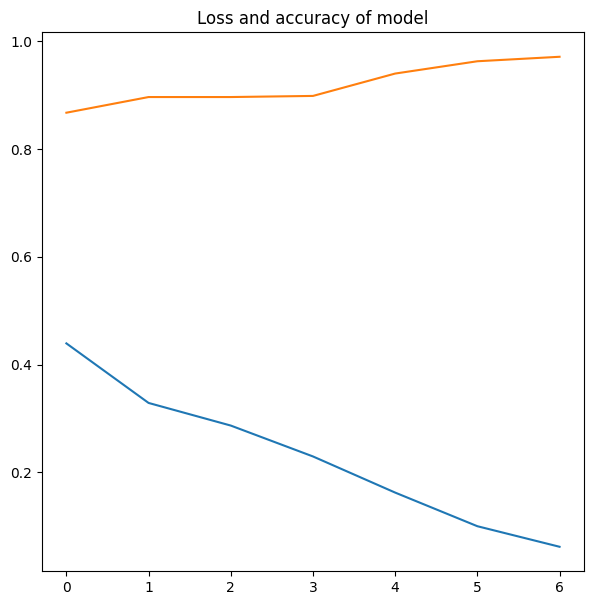

In [ ]:
#Plotting a histogram over the 7 epocs and plotting the accuracy and loss
history = pd.DataFrame(hist.history)
plt.figure(figsize=(7,7));
plt.plot(history["loss"]);
plt.plot(history["accuracy"]);
plt.title("Loss and accuracy of model");
plt.show();


In [ ]:
#Testing the model, and retrieveing score and accuracy:
score,acc = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

8/8 [==============================] - 3s 293ms/step - loss: 0.4491 - accuracy: 0.8319
score: 0.45
accuracy: 0.83


In [ ]:
#now we validate for the models accuracy in predicting either a positive, or a negative score:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
x_test = X_test[:-validation_size]
y_test = Y_test[:-validation_size]

In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,x_test.shape[1]),verbose = 2)[0]
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
print("positive_acc", pos_correct/pos_cnt*100, "%")
print("negative_acc", neg_correct/neg_cnt*100, "%")

1/1 - 1s - 1s/epoch - 1s/step
1/1 - 0s - 299ms/epoch - 299ms/step
1/1 - 0s - 215ms/epoch - 215ms/step
1/1 - 0s - 225ms/epoch - 225ms/step
1/1 - 0s - 171ms/epoch - 171ms/step
1/1 - 0s - 263ms/epoch - 263ms/step
1/1 - 0s - 411ms/epoch - 411ms/step
1/1 - 0s - 431ms/epoch - 431ms/step
1/1 - 0s - 226ms/epoch - 226ms/step
1/1 - 0s - 126ms/epoch - 126ms/step
1/1 - 0s - 143ms/epoch - 143ms/step
1/1 - 0s - 135ms/epoch - 135ms/step
1/1 - 0s - 132ms/epoch - 132ms/step
1/1 - 0s - 139ms/epoch - 139ms/step
1/1 - 0s - 129ms/epoch - 129ms/step
1/1 - 0s - 123ms/epoch - 123ms/step
1/1 - 0s - 137ms/epoch - 137ms/step
1/1 - 0s - 138ms/epoch - 138ms/step
1/1 - 0s - 142ms/epoch - 142ms/step
1/1 - 0s - 138ms/epoch - 138ms/step
1/1 - 0s - 150ms/epoch - 150ms/step
1/1 - 0s - 132ms/epoch - 132ms/step
1/1 - 0s - 142ms/epoch - 142ms/step
1/1 - 0s - 130ms/epoch - 130ms/step
1/1 - 0s - 139ms/epoch - 139ms/step
1/1 - 0s - 144ms/epoch - 144ms/step
1/1 - 0s - 142ms/epoch - 142ms/step
1/1 - 0s - 138ms/epoch - 138ms/ste

In [ ]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = ['your customer service is the absolute worst i now have a mess of books on my kindle']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  51 510 674  12   2 895   1  69  11   6
   13  16  20   3   4]]
1/1 - 0s - 142ms/epoch - 142ms/step
positive


What went wrong?

Our sample size for the training-, and test set was in fact quite small (under 1000 comments), and the proportion of negative to positive comments was skewed about 1 to 9. So the algorithm was not really optimized on the basis of our data. This is the reason for the algorithm choosing the wrong sentiment in the sample-test above

NAIVE BAYES

In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data/

--2024-01-03 20:46:29--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘data/aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  19.8MB/s    in 5.6s    

2024-01-03 20:46:35 (14.2 MB/s) - ‘data/aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



In [ ]:
import os
import numpy as np
import re
import nltk
from collections import Counter, defaultdict
from tqdm import tqdm_notebook

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

EXTRACT DATA

In [ ]:
%%time
!tar -xzf data/aclImdb_v1.tar.gz -C data/

CPU times: user 130 ms, sys: 12.4 ms, total: 142 ms
Wall time: 14.4 s


In [ ]:
data_folder = 'data/aclImdb/'

In [ ]:
rp = os.path.join(data_folder, 'train/pos')
train_positive = [os.path.join(rp, f) for f in os.listdir(rp)]
rp = os.path.join(data_folder, 'train/neg')
train_negative = [os.path.join(rp, f) for f in os.listdir(rp)]

rp = os.path.join(data_folder, 'test/pos')
test_positive = [os.path.join(rp, f) for f in os.listdir(rp)]
rp = os.path.join(data_folder, 'test/neg')
test_negative = [os.path.join(rp, f) for f in os.listdir(rp)]

REGEX FOR CLEANING HTML TAGS

In [ ]:
re_html_cleaner = re.compile(r"<.*?>")

In [ ]:
n_train = 2500
n_test = 2500

UNIGRAM COUNTER - Calculates distribution , empirically from training data

In [ ]:
# Distribution of word tokens in positive samples
positive_word_counts = Counter()

for _fname in tqdm_notebook(train_positive[:n_train], desc="Crunching +ve samples: "):
    with open(_fname) as f:
        text = f.read().strip()
        text = re_html_cleaner.sub(" ", text)
        positive_word_counts += Counter(nltk.word_tokenize(text))

# Distribution of word tokens in negative samples
negative_word_counts = Counter()

for _fname in tqdm_notebook(train_negative[:n_train], desc="Crunching -ve samples: "):
    with open(_fname) as f:
        text = f.read().strip()
        text = re_html_cleaner.sub(" ", text)
        negative_word_counts += Counter(nltk.word_tokenize(text))

<ipython-input-78-e6884a602f37>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _fname in tqdm_notebook(train_positive[:n_train], desc="Crunching +ve samples: "):


Crunching +ve samples:   0%|          | 0/2500 [00:00<?, ?it/s]

<ipython-input-78-e6884a602f37>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _fname in tqdm_notebook(train_negative[:n_train], desc="Crunching -ve samples: "):


Crunching -ve samples:   0%|          | 0/2500 [00:00<?, ?it/s]

In [ ]:
print('Top k frequent words from positive class:\n\n')
for w, c in positive_word_counts.most_common(10):
    print(f"{w}\t{c}")

print('\n\nTop k frequent words from negative class:\n\n')
for w, c in negative_word_counts.most_common(10):
    print(f"{w}\t{c}")

Top k frequent words from positive class:


the	30433
,	28993
.	27752
and	17496
a	16135
of	15258
to	13456
is	11907
in	9560
it	7691


Top k frequent words from negative class:


the	27443
.	27300
,	25763
a	15015
and	13763
to	13389
of	13264
is	10154
I	8641
in	7857


In [ ]:
len_corpus_pos = sum(positive_word_counts.values())
len_corpus_neg = sum(negative_word_counts.values())
V_pos = len(positive_word_counts)
V_neg = len(negative_word_counts)
alpha = 0.1
log_p_vocab_pos = defaultdict(
    lambda: np.log(alpha/len_corpus_pos),
    {w:np.log((alpha + c)/(V_pos*alpha + len_corpus_pos)) for w,c in positive_word_counts.items()}
)
log_p_vocab_neg = defaultdict(
    lambda: np.log(alpha/len_corpus_neg),
    {w:np.log((alpha + c)/(V_neg*alpha + len_corpus_neg)) for w,c in negative_word_counts.items()})

In [ ]:
p_data_pos = len(train_positive)/(len(train_positive) + len(train_negative))
print(f"Prob. of +ve sentiment in our dataset: {p_data_pos}")

Prob. of +ve sentiment in our dataset: 0.5


In [ ]:
def get_prob_pos(doc):
    text = doc.strip()
    text = re_html_cleaner.sub(" ", text)
    tokens = nltk.word_tokenize(text)
    p_pos = 1
    p_neg = 1
    for token in tokens:
        p_pos += log_p_vocab_pos[token]
        p_neg += log_p_vocab_neg[token]

    return 1.0*(p_pos >= p_neg) #/(p_pos+p_neg)

In [ ]:
results = []
for _fname in tqdm_notebook(test_positive[:n_test], desc="Classifying test data: "):
    with open(_fname) as f:
        results.append((1, get_prob_pos(f.read())))


for _fname in tqdm_notebook(test_negative[:n_test], desc="Classifying test data: "):
    with open(_fname) as f:
        results.append((0, get_prob_pos(f.read())))

<ipython-input-83-d2d5dddd0d49>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _fname in tqdm_notebook(test_positive[:n_test], desc="Classifying test data: "):


Classifying test data:   0%|          | 0/2500 [00:00<?, ?it/s]

<ipython-input-83-d2d5dddd0d49>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _fname in tqdm_notebook(test_negative[:n_test], desc="Classifying test data: "):


Classifying test data:   0%|          | 0/2500 [00:00<?, ?it/s]

PERFORMANCE EVALUATION OF OUR MODEL

In [ ]:
true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0
for true_label, pred_label in results:
    if true_label == 1 and pred_label == 1:
        true_pos += 1
    elif true_label == 1 and pred_label == 0:
        false_neg += 1
    elif true_label == 0 and pred_label == 1:
        false_pos += 1
    elif true_label == 0 and pred_label == 0:
        true_neg += 1

In [ ]:
print(f"Accuracy: {(true_pos + true_neg)/(true_pos + true_neg + false_pos + false_neg):0.4F}")
print(f"Recall: {(true_pos)/(true_pos + false_neg):0.4F}")
print(f"Precision: {(true_pos)/(true_pos + false_pos):0.4F}")

Accuracy: 0.7860
Recall: 0.7224
Precision: 0.8277


CLASSIFICATION METRICS

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
results[:10]

[(1, 1.0),
 (1, 1.0),
 (1, 1.0),
 (1, 0.0),
 (1, 1.0),
 (1, 1.0),
 (1, 0.0),
 (1, 1.0),
 (1, 1.0),
 (1, 1.0)]

In [ ]:
u, v = zip((1, 1), (1, 0), (0, 1), (0, 1))
print(u)
print(v)

(1, 1, 0, 0)
(1, 0, 1, 1)


In [ ]:
# Use zip to collect the first and second elemnts of each tuple within results
# array to two separate lists
y_true, y_pred = zip(*results)

In [ ]:
print("Accuracy (using sklearn package):", accuracy_score(y_true, y_pred))

Accuracy (using sklearn package): 0.786


In [ ]:
print(confusion_matrix(y_true, y_pred))

[[2124  376]
 [ 694 1806]]
